In [3]:
!pip install ultralytics
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 71.2 MB/s eta 0:00:00


In [4]:
from google.colab import drive
from ultralytics import YOLO
import matplotlib.pyplot as plt
import rasterio
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
drive.mount('/content/drive')

# Define the path to your dataset and model configuration
data_path = "/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images"
config_file = "yolov8n.yaml"

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


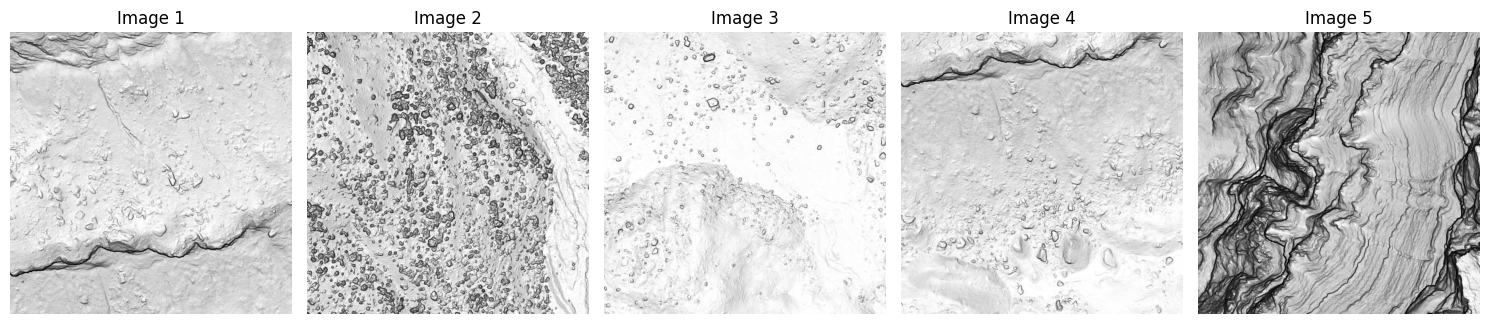

In [11]:
def display_images(data_path):
    # List all .tif files in the directory
    tif_files = [f for f in os.listdir(data_path) if f.endswith('.jpg')]

    # Ensure there are at least 5 images
    num_images = min(5, len(tif_files))
    if num_images == 0:
        print("No .jpg files found in the directory.")
        return

    # Plot the first 5 images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        file_path = os.path.join(data_path, tif_files[i])
        with rasterio.open(file_path) as src:
            image = src.read(1)  # Read the first band
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Image {i+1}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Display the images
display_images(data_path)

In [11]:
import glob
from PIL import Image
input_dir = '/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test'  # Replace with the folder containing .tif files
output_dir = '/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test'  # Replace with your desired output folder

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Loop through all .tif files in the input directory
for tif_file in glob.glob(os.path.join(input_dir, '*.tif')):
    try:
        # Open the .tif file
        with Image.open(tif_file) as img:
            # Create the .jpg file path
            jpg_file = os.path.join(output_dir, os.path.basename(tif_file).replace('.tif', '.jpg'))

            # Convert the image to RGB and save as .jpg
            img.convert('RGB').save(jpg_file, 'JPEG')
            print(f"Converted: {tif_file} -> {jpg_file}")
    except Exception as e:
        print(f"Error converting {tif_file}: {e}")

Converted: /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test/2595_1098_0_0.tif -> /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test/2595_1098_0_0.jpg
Converted: /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test/2595_1098_1_0.tif -> /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test/2595_1098_1_0.jpg
Converted: /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test/2595_1098_3_2.tif -> /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test/2595_1098_3_2.jpg
Converted: /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/test/2595_1098_0_1.tif -> /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/d

In [15]:
model = YOLO(config_file)  # Load a YOLOv8 model

In [25]:


# Train the model
model.train(
    data="/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/dataset.yaml",          # Path to the dataset
    epochs=10,               # Number of training epochs
    imgsz=640,               # Image size for training
    batch=16,                # Batch size
    name="yolov8_hillshade", # Name of the training run
    project="yolov8_train",  # Directory to save training results
    workers=4                # Number of data loader workers
)


Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=yolov8_train, name=yolov8_hillshade5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

train: Scanning /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/labels.cache... 576 images, 283 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2582_1127_0_1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2588_1133_0_2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2588_1133_1_2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2598_1132_0_3.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2598_1132_1_3.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_h


val: Scanning /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/labels.cache... 64 images, 37 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<?, ?it/s]

Plotting labels to yolov8_train/yolov8_hillshade5/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to yolov8_train/yolov8_hillshade5
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.249      2.932      1.961         54        640: 100%|██████████| 36/36 [09:10<00:00, 15.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.42s/it]

                   all         64        292      0.185      0.229      0.103     0.0476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      2.224      2.847      1.865         13        640: 100%|██████████| 36/36 [09:15<00:00, 15.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.10s/it]

                   all         64        292     0.0566      0.205     0.0327     0.0152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      2.174      2.642      1.852        108        640: 100%|██████████| 36/36 [09:21<00:00, 15.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.75s/it]

                   all         64        292       0.39      0.219      0.217     0.0957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G       2.21      2.686      1.874         20        640: 100%|██████████| 36/36 [09:04<00:00, 15.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:30<00:00, 15.12s/it]

                   all         64        292     0.0132      0.322     0.0103    0.00212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      2.055      2.648      1.827         25        640: 100%|██████████| 36/36 [09:06<00:00, 15.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.04s/it]

                   all         64        292      0.409      0.421      0.354      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      2.053      2.623      1.779         80        640: 100%|██████████| 36/36 [09:09<00:00, 15.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.88s/it]

                   all         64        292      0.416      0.298       0.28      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      2.076      2.502       1.77        101        640: 100%|██████████| 36/36 [09:11<00:00, 15.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.48s/it]

                   all         64        292      0.475      0.425      0.404      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G       2.04      2.411      1.777         31        640: 100%|██████████| 36/36 [09:03<00:00, 15.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.15s/it]

                   all         64        292      0.504      0.425      0.428      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.954       2.41      1.706        101        640: 100%|██████████| 36/36 [09:35<00:00, 15.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:27<00:00, 13.91s/it]

                   all         64        292      0.516      0.449      0.411      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.941      2.367      1.688         42        640: 100%|██████████| 36/36 [09:18<00:00, 15.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.33s/it]

                   all         64        292      0.522      0.449      0.421      0.223



10 epochs completed in 1.620 hours.
Optimizer stripped from yolov8_train/yolov8_hillshade5/weights/last.pt, 6.2MB
Optimizer stripped from yolov8_train/yolov8_hillshade5/weights/best.pt, 6.2MB

Validating yolov8_train/yolov8_hillshade5/weights/best.pt...
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.86s/it]


                   all         64        292       0.52      0.449      0.421      0.222
Speed: 8.8ms preprocess, 299.3ms inference, 0.0ms loss, 10.3ms postprocess per image
Results saved to yolov8_train/yolov8_hillshade5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f0b4eb93760>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [9]:
results = model.predict(
    source='/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images',  # Path to test images or a single image
    save=True,                     # Save prediction images
    save_txt=True,                 # Save predictions in YOLO format
    conf=0.5,                     # Confidence threshold (adjust as needed)
    imgsz=640                      # Image size (ensure it matches your training)
)


image 1/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2581_1126_1_2.jpg: 640x640 1 rock, 487.1ms
image 2/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2581_1126_3_2.jpg: 640x640 1 rock, 207.4ms
image 3/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2581_1127_0_2.jpg: 640x640 (no detections), 213.5ms
image 4/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2581_1127_2_0.jpg: 640x640 (no detections), 203.5ms
image 5/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2581_1127_2_2.jpg: 640x640 (no detections), 207.2ms
image 6/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2582_1126_1_1.jpg: 

In [1]:
results = model.predict(
    source='/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images',
    conf=0.5,  # Lower confidence
    imgsz=640,
    save_txt=True  # Ensure predictions are saved
)

NameError: name 'model' is not defined

In [55]:
import glob

# Directory to search
directory = 'yolov8_train/yolov8_hillshade5/labels/'

# List all files
all_files = glob.glob(directory + '*')  # Add '**/*' for recursive search

print("Files in the directory:")
for file in all_files:
    print(file)

Files in the directory:


In [57]:
print(os.listdir('runs/detect/predict2'))

['labels']


In [8]:
model = YOLO('/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/best_model.pt')

runs/detect/predict/labels/2587_1133_3_3.txt


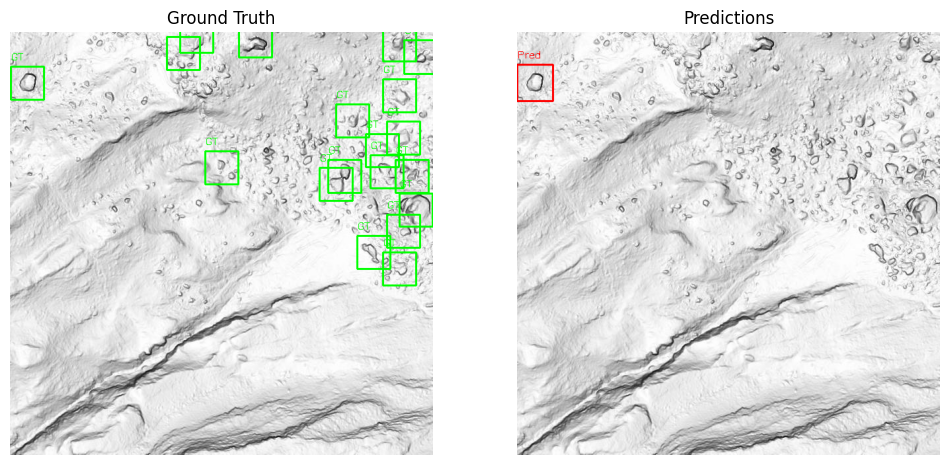

runs/detect/predict/labels/2581_1127_0_2.txt
No predictions found for 2581_1127_0_2.txt
runs/detect/predict/labels/2587_1133_3_2.txt


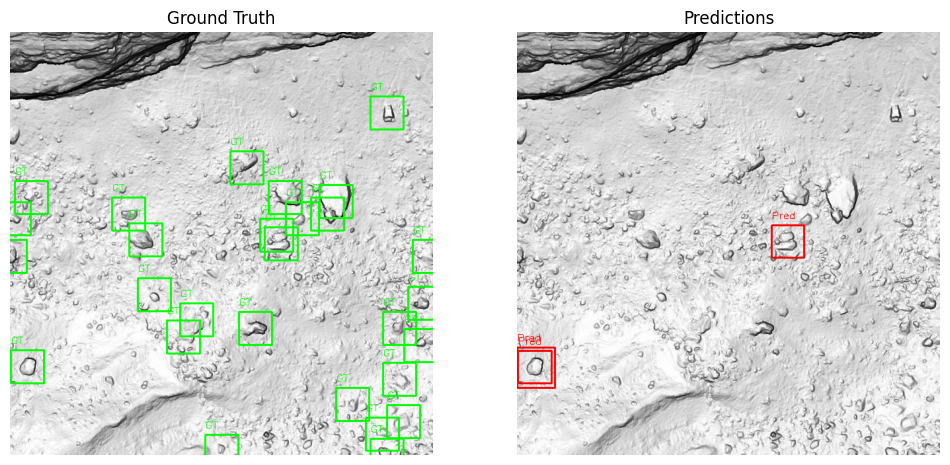

runs/detect/predict/labels/2589_1133_0_3.txt


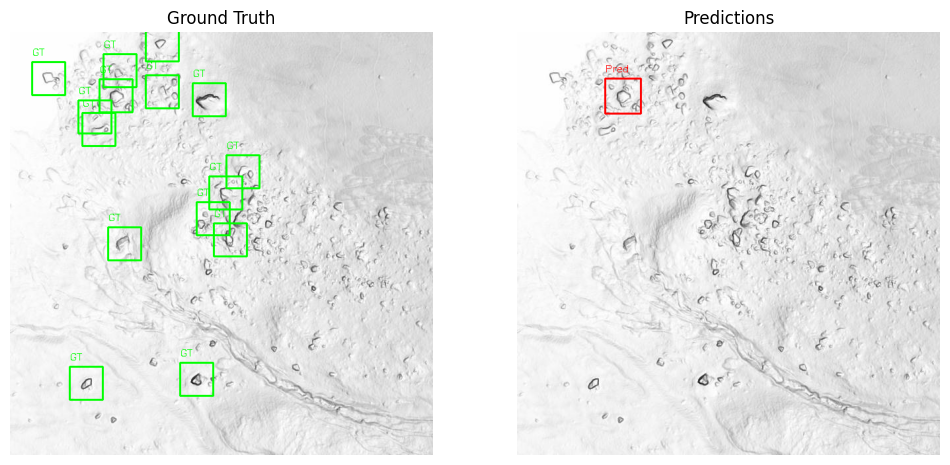

runs/detect/predict/labels/2593_1129_0_0.txt
No predictions found for 2593_1129_0_0.txt
runs/detect/predict/labels/2581_1126_3_2.txt


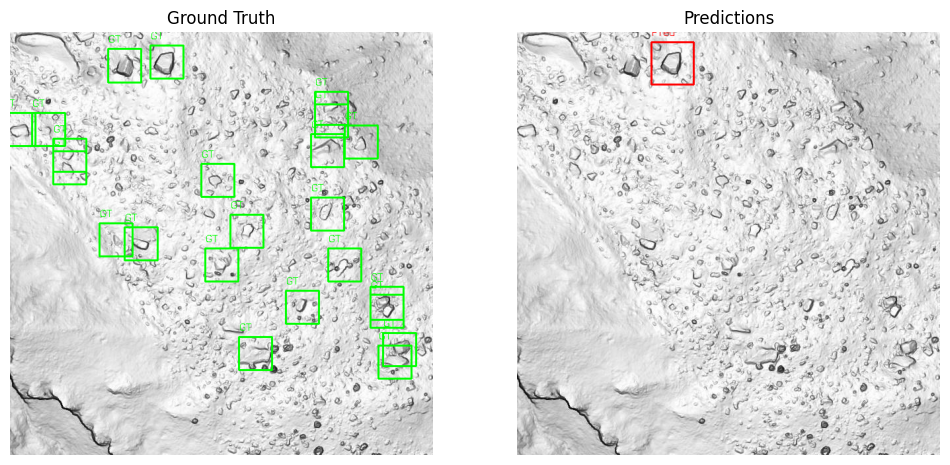

runs/detect/predict/labels/2581_1126_1_2.txt


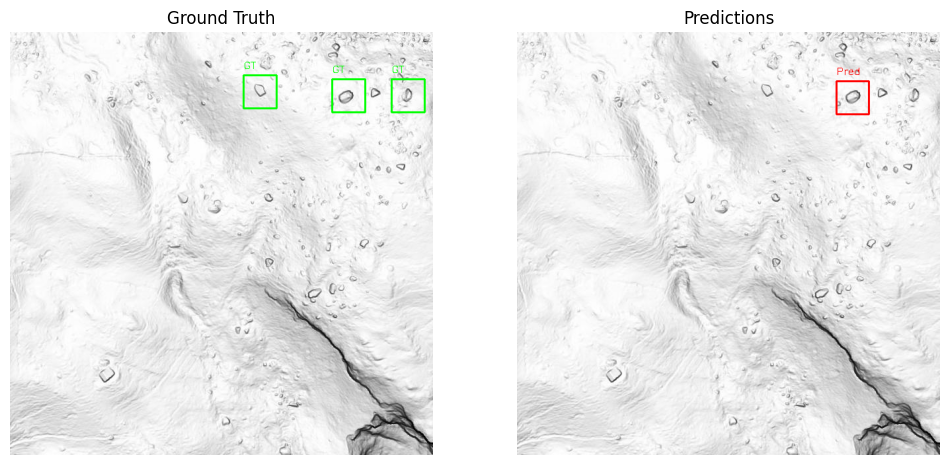

runs/detect/predict/labels/2583_1127_3_3.txt
No predictions found for 2583_1127_3_3.txt
runs/detect/predict/labels/2665_1136_1_3.txt
No predictions found for 2665_1136_1_3.txt
runs/detect/predict/labels/2614_1140_2_2.txt


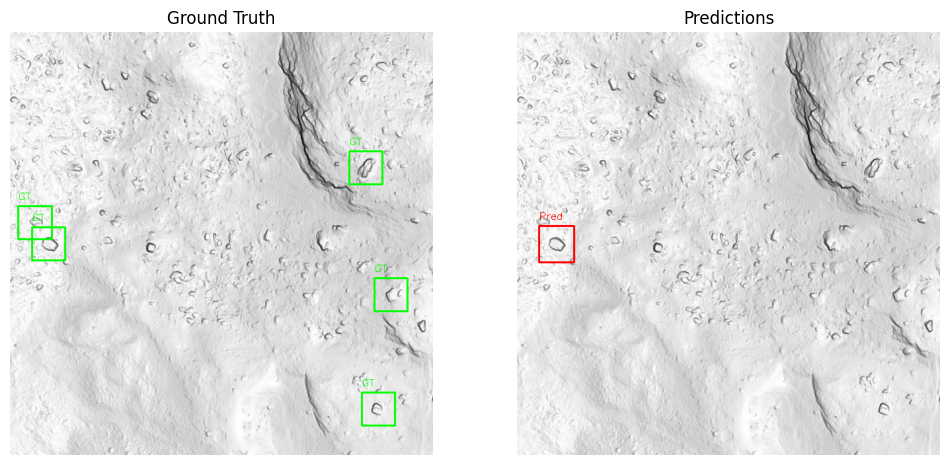

runs/detect/predict/labels/2582_1126_2_2.txt
No predictions found for 2582_1126_2_2.txt
runs/detect/predict/labels/2632_1144_0_0.txt
No predictions found for 2632_1144_0_0.txt
runs/detect/predict/labels/2582_1126_1_1.txt
No predictions found for 2582_1126_1_1.txt
runs/detect/predict/labels/2594_1132_0_3.txt
No predictions found for 2594_1132_0_3.txt
runs/detect/predict/labels/2597_1131_3_1.txt
No predictions found for 2597_1131_3_1.txt
runs/detect/predict/labels/2597_1131_2_1.txt


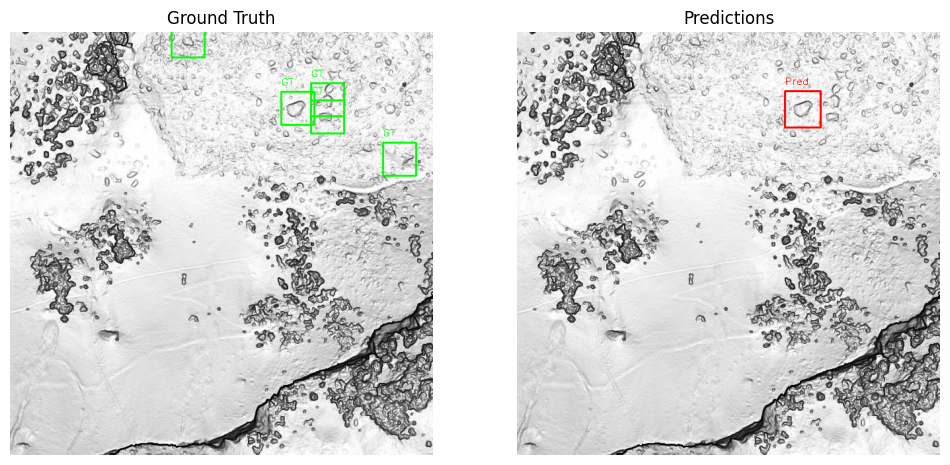

runs/detect/predict/labels/2598_1131_0_0.txt


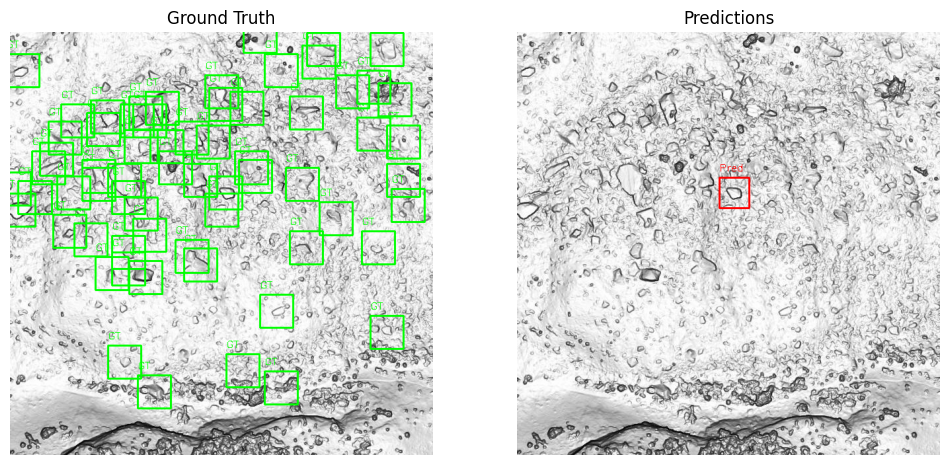

runs/detect/predict/labels/2598_1131_2_1.txt
No predictions found for 2598_1131_2_1.txt
runs/detect/predict/labels/2595_1132_0_1.txt


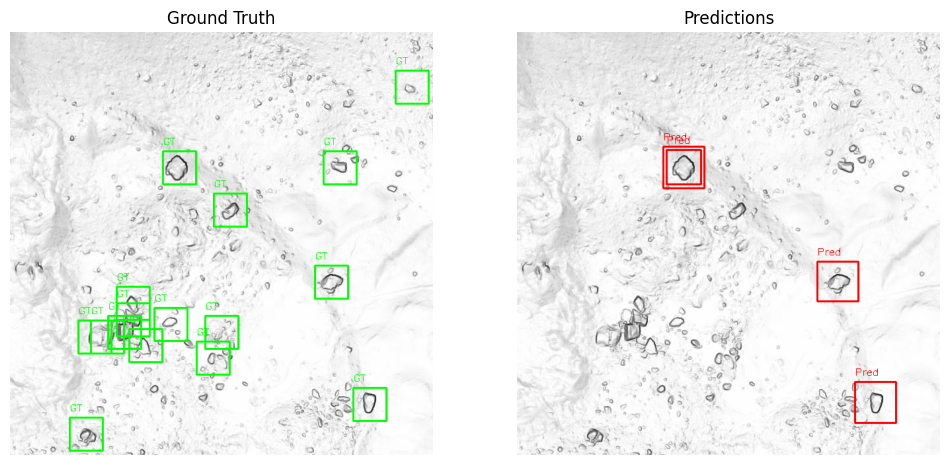

runs/detect/predict/labels/2595_1132_1_1.txt


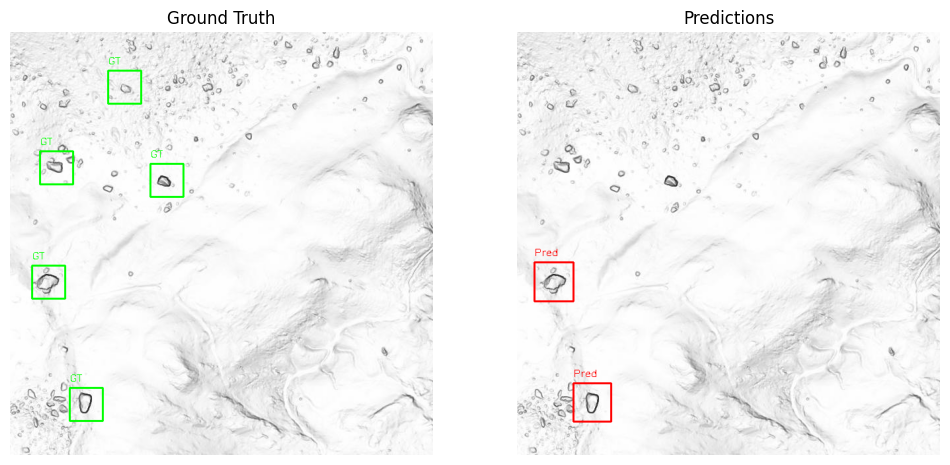

runs/detect/predict/labels/2598_1131_3_3.txt
No predictions found for 2598_1131_3_3.txt
runs/detect/predict/labels/2598_1131_3_1.txt


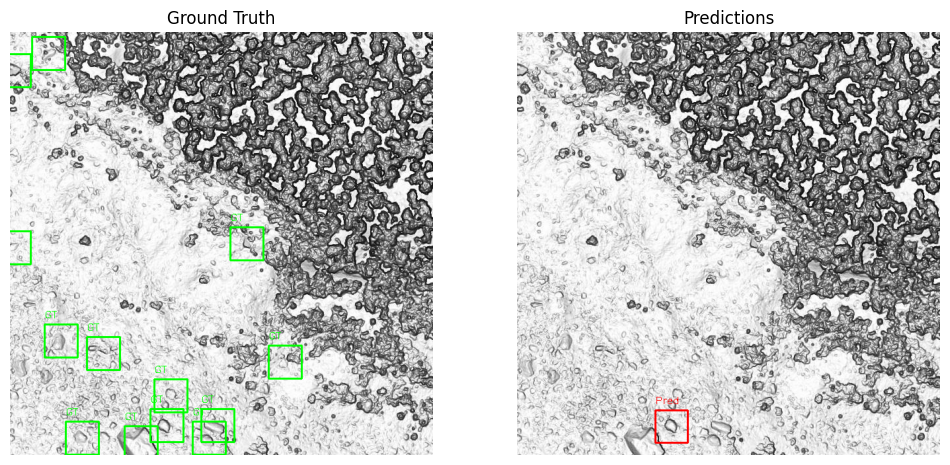

In [10]:
import os
import cv2
import matplotlib.pyplot as plt

# Paths
val_images_path = '/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images'
val_labels_path = '/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/labels'
predicted_images_path = 'yolov8_train/yolov8_hillshade5'
predicted_labels_path = 'runs/detect/predict/labels'

# Helper function to load YOLO labels
def load_yolo_labels(label_file):
    with open(label_file, 'r') as f:
        lines = f.readlines()
    return [list(map(float, line.strip().split())) for line in lines]

# Helper function to draw bounding boxes
def draw_boxes(image, boxes, color, label_type=""):
    h, w, _ = image.shape
    for box in boxes:
        x_center, y_center, width, height = box[1:]  # YOLO format: <class_id> <x_center> <y_center> <width> <height>
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, f"{label_type}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

# Iterate over validation set
for label_file in os.listdir(val_labels_path):
    label_path = os.path.join(val_labels_path, label_file)
    # Check if the label file contains more than one label
    labels = load_yolo_labels(label_path)
    if len(labels) > 1:
        # Load the corresponding image
        image_file = label_file.replace('.txt', '.jpg')  # Assuming images are .jpg
        image_path = os.path.join(val_images_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Draw ground truth boxes
        ground_truth_image = image.copy()
        draw_boxes(ground_truth_image, labels, color=(0, 255, 0), label_type="GT")  # Green for ground truth

        # Load the model's predictions
        pred_label_path = os.path.join(predicted_labels_path, label_file)
        print(pred_label_path)
        if os.path.exists(pred_label_path):
            predictions = load_yolo_labels(pred_label_path)
            predicted_image = image.copy()
            draw_boxes(predicted_image, predictions, color=(255, 0, 0), label_type="Pred")  # Red for predictions
        else:
            print(f"No predictions found for {label_file}")
            continue

        # Plot side by side
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(ground_truth_image)
        axes[0].set_title("Ground Truth")
        axes[0].axis('off')

        axes[1].imshow(predicted_image)
        axes[1].set_title("Predictions")
        axes[1].axis('off')

        plt.show()


In [59]:
import shutil

# Define source and destination paths
source = 'yolov8_train/yolov8_hillshade5/weights/best.pt'
destination = '/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/best_model.pt'

# Copy the file
shutil.copy(source, destination)
print("Model saved successfully!")

Model saved successfully!
